In [3]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import warnings
import plotly.express as px
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data_dummies.csv')
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Name', 'Location', 'Price', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Mileage_new', 'Brand',
       'Name_new', 'Brand_new', 'location_label'],
      dtype='object')

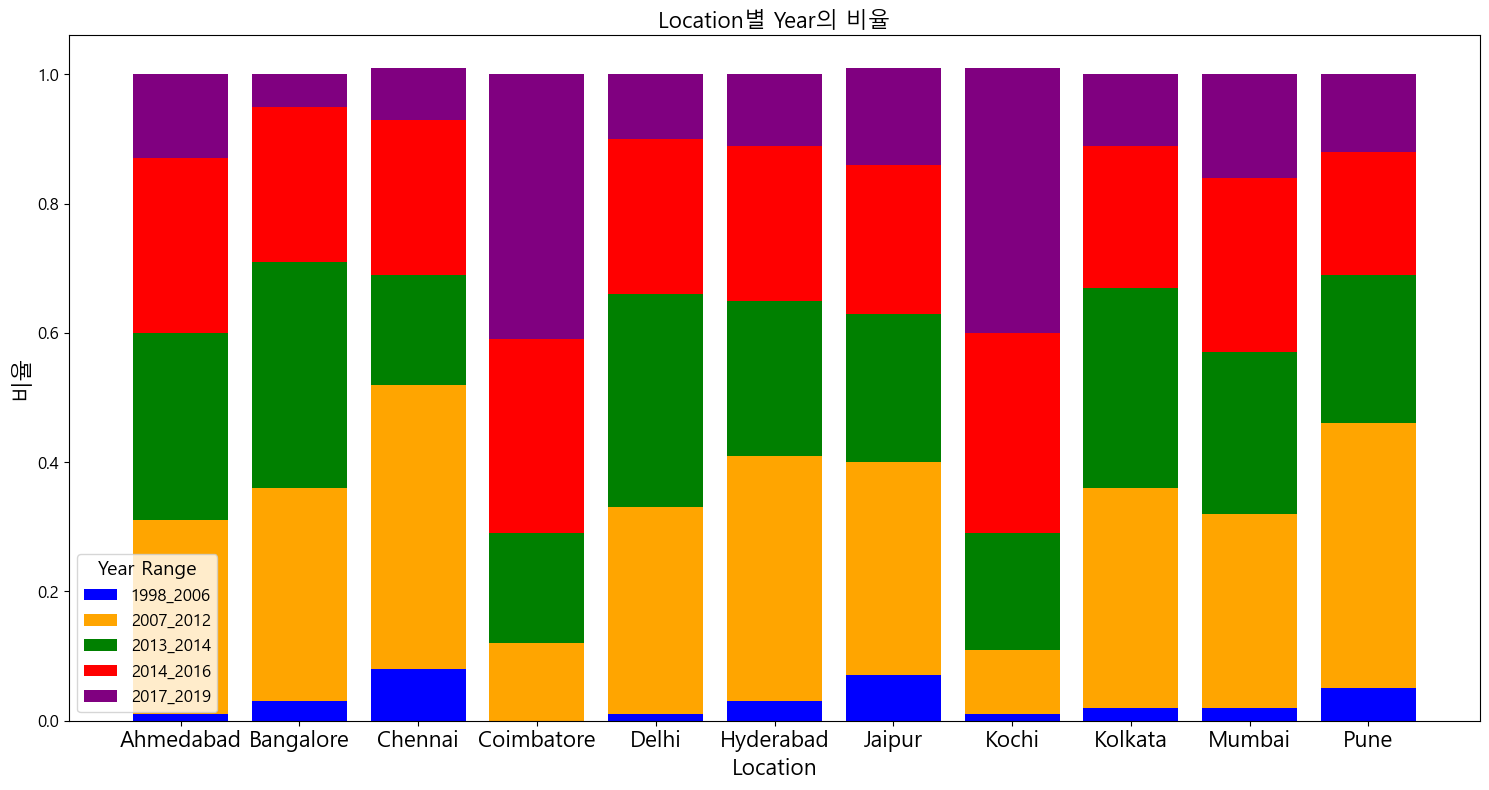

In [11]:
df_cross1 = pd.crosstab(df['Location'], df['Year'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['1998_2006'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['2007_2012'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['2013_2014'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)
df_cross1['2014_2016'] = round(df_cross1.iloc[:,3] / df_cross1['sum'],2)
df_cross1['2017_2019'] = round(df_cross1.iloc[:,4] / df_cross1['sum'],2)

df_cross1[['1998_2006', '2007_2012', '2013_2014','2014_2016', '2017_2019']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['1998_2006', '2007_2012', '2013_2014', '2014_2016', '2017_2019']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Year의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Year Range', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [17]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3251
Others    2800
Name: count, dtype: int64

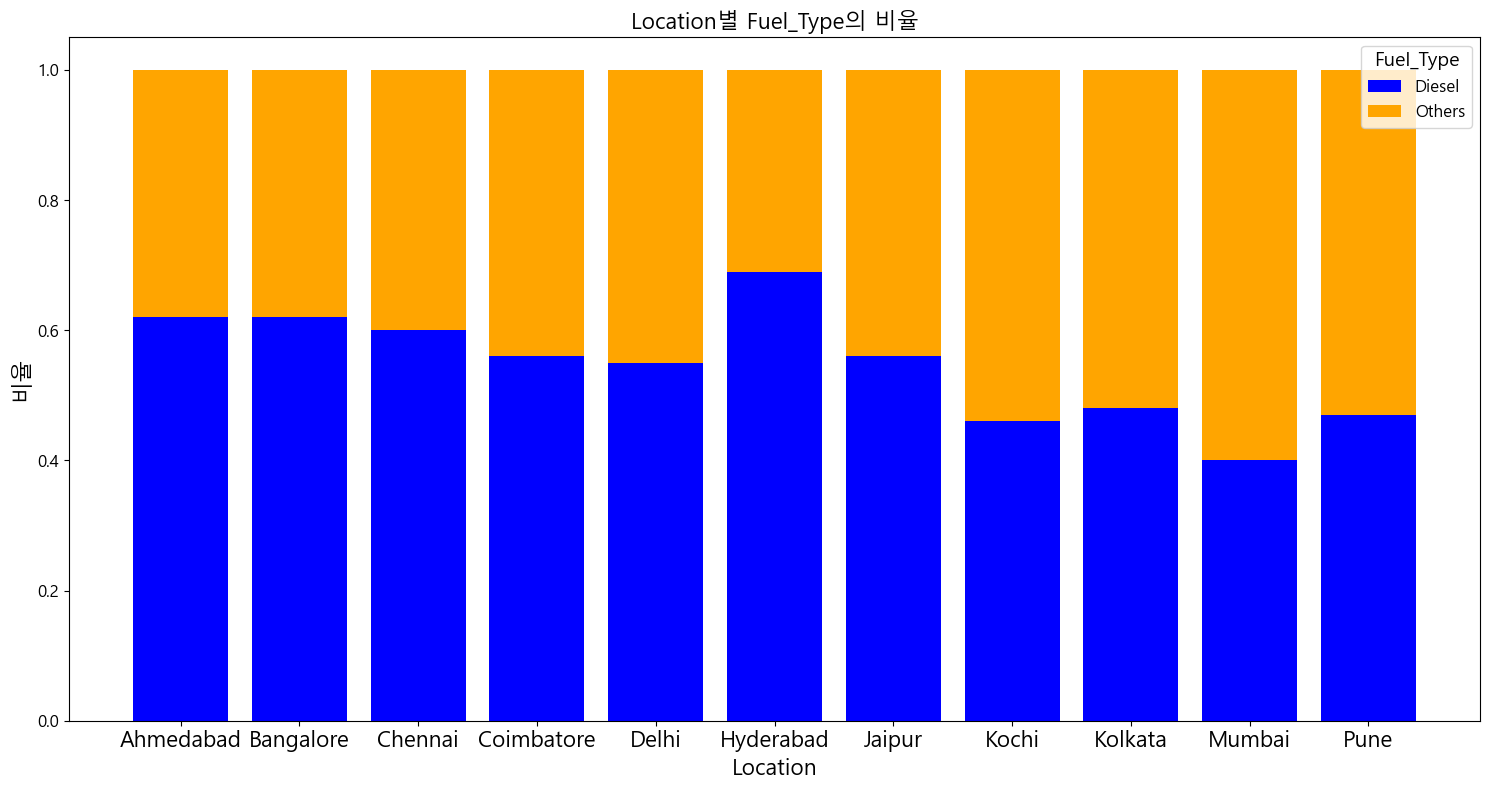

In [26]:
df_cross1 = pd.crosstab(df['Location'], df['Fuel_Type'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['Diesel'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['Others'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)

df_cross1[['Diesel', 'Others']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['Diesel', 'Others']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Fuel_Type의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Fuel_Type', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [40]:
df['Transmission'].value_counts()

Transmission
Manual       4308
Automatic    1743
Name: count, dtype: int64

In [ ]:
# transmisstion은 형석님이

Transmission  Manual  Automatic
Location                       
Ahmedabad       0.73       0.27
Bangalore       0.59       0.41
Chennai         0.76       0.24
Coimbatore      0.61       0.39
Delhi           0.70       0.30
Hyderabad       0.74       0.26
Jaipur          0.87       0.13
Kochi           0.69       0.31
Kolkata         0.85       0.15
Mumbai          0.61       0.39
Pune            0.76       0.24


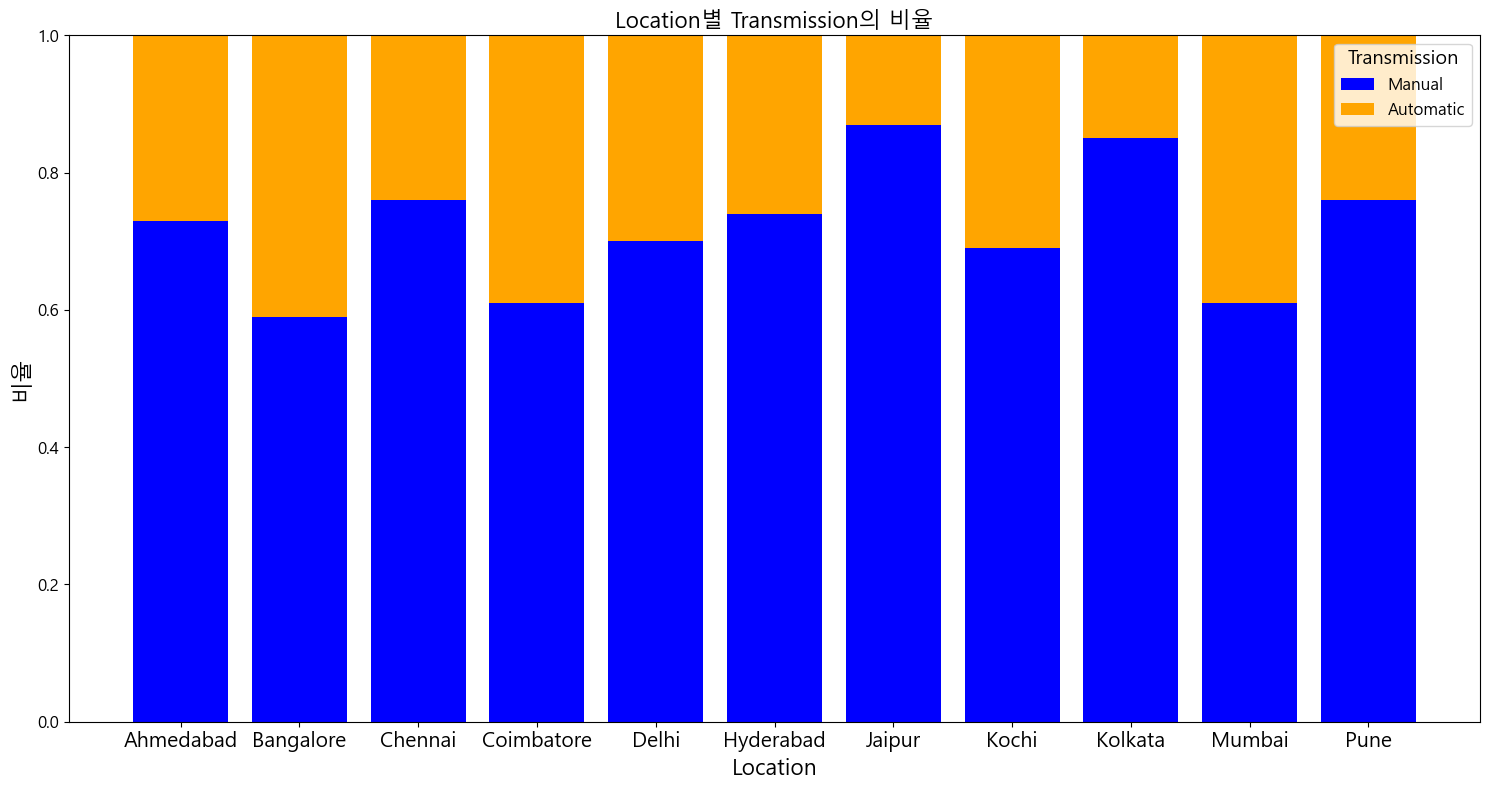

In [50]:
# pd.crosstab을 통해 교차표 생성
df_cross1 = pd.crosstab(df['Location'], df['Transmission'])
df_cross1['sum'] = df_cross1.sum(axis=1)
df_cross1['Manual'] = round(df_cross1['Manual'] / df_cross1['sum'], 2)
df_cross1['Automatic'] = round(df_cross1['Automatic'] / df_cross1['sum'], 2)
# 필요한 열만 선택
df_cross1 = df_cross1[['Manual', 'Automatic']]
# df_cross1 출력 확인
print(df_cross1)
# 누적 막대 그래프 그리기
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정
# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange']  # Manual과 Automatic에 대한 색상 지정
# 각 비율을 누적 막대로 그리기
for i, column in enumerate(df_cross1.columns):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]
# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_ylim(0, 1)  # y축 범위 설정
ax.set_title('Location별 Transmission의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Transmission', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정
# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=12)
# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [32]:
df_cross1

Transmission,Automatic,Manual,sum
Location,,,
Ahmedabad,0.0,0.27,227
Bangalore,0.0,0.41,354
Chennai,0.0,0.24,489
Coimbatore,0.0,0.39,656
Delhi,0.0,0.30,564
Hyderabad,0.0,0.26,732
Jaipur,0.0,0.13,413
Kochi,0.0,0.31,668
Kolkata,0.0,0.15,540


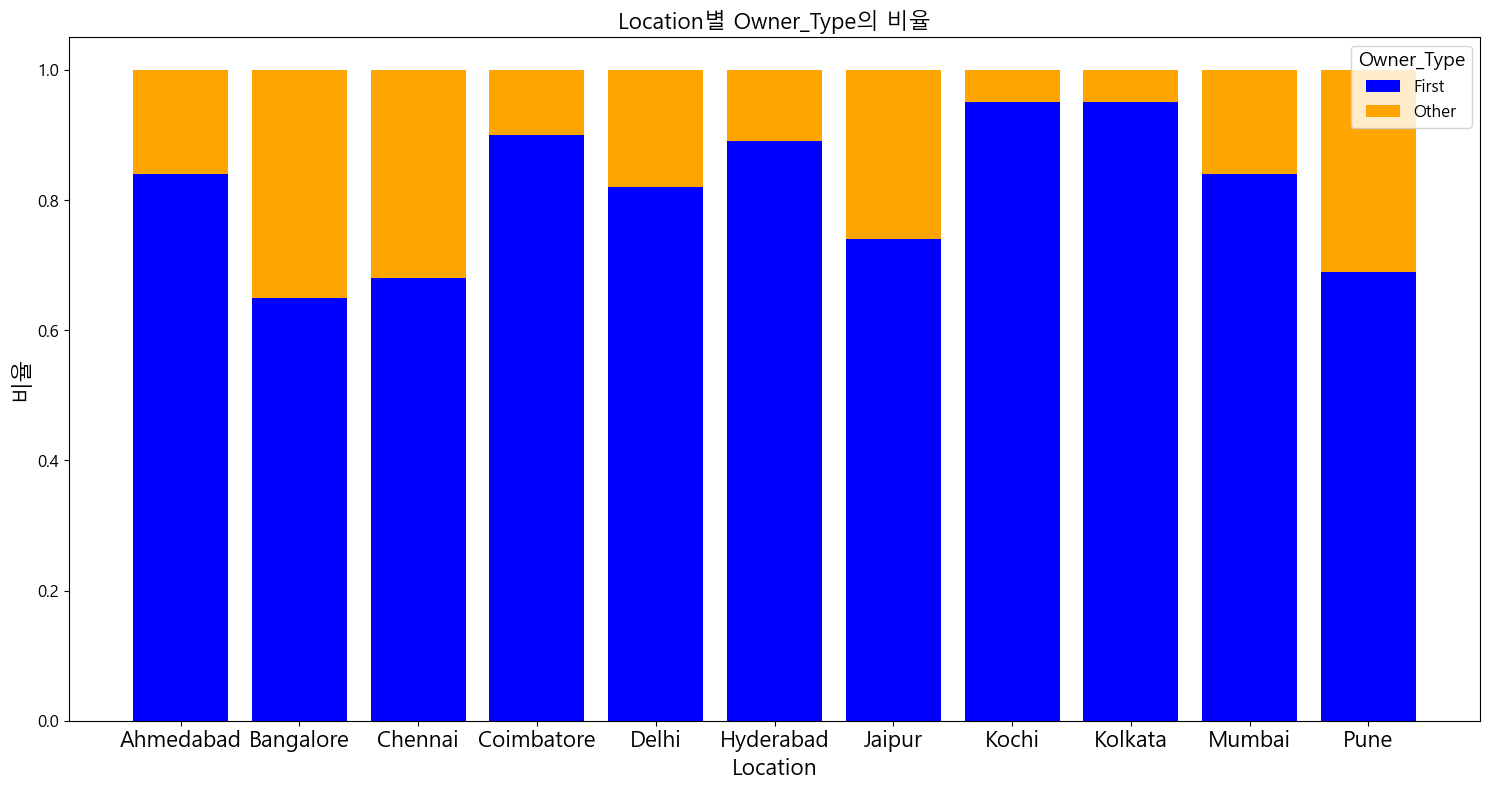

In [52]:
df_cross1 = pd.crosstab(df['Location'], df['Owner_Type'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['First'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['Other'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)


df_cross1[['First','Other']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['First','Other']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Owner_Type의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Owner_Type', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

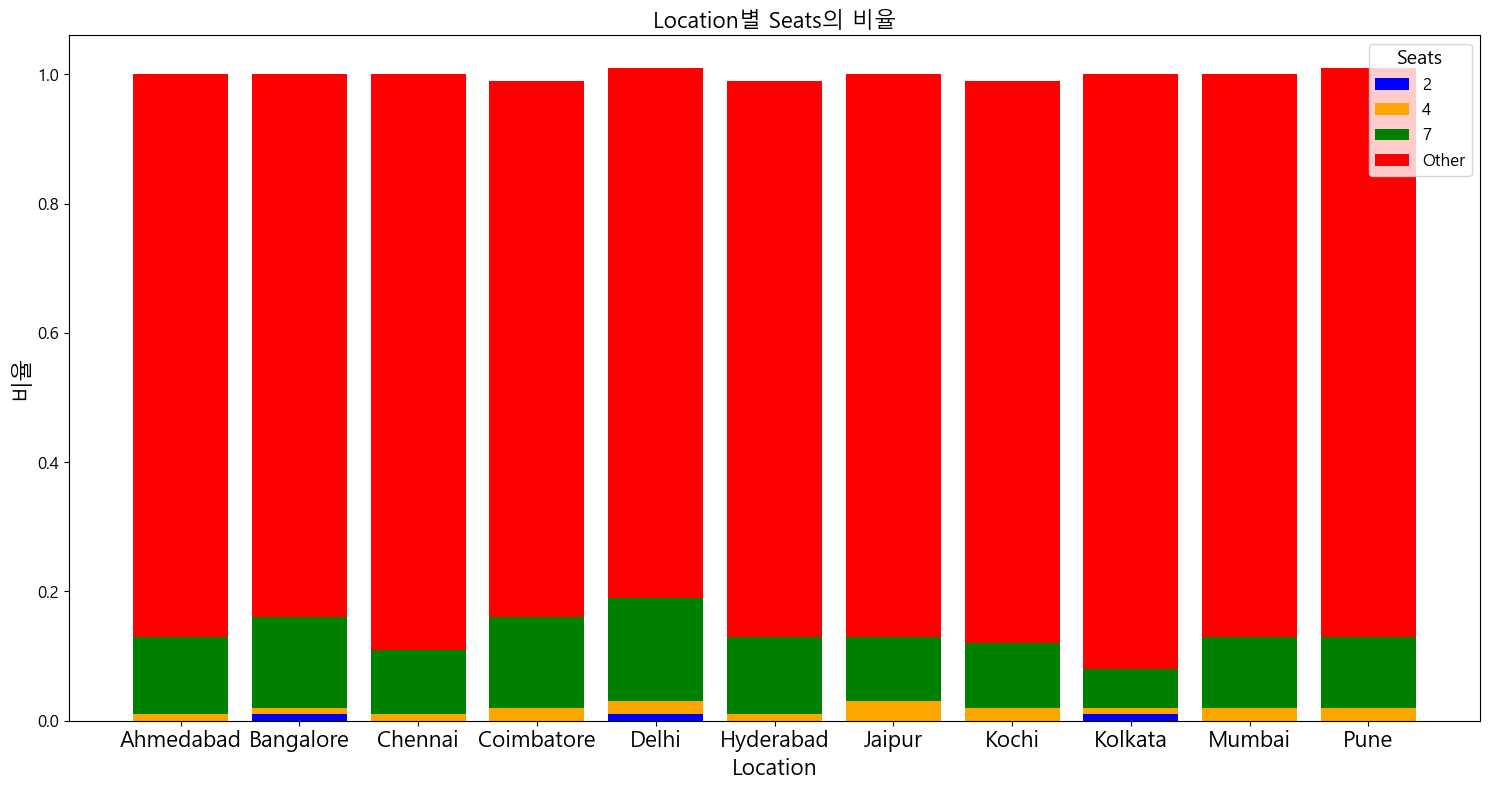

In [96]:
df_cross1 = pd.crosstab(df['Location'], df['Seats'])
df_cross1['sum'] = df_cross1.sum(axis = 1)
df_cross1['2'] = round(df_cross1['2'] / df_cross1['sum'],2)
df_cross1['4'] = round(df_cross1['4'] / df_cross1['sum'],2)
df_cross1['7'] = round(df_cross1['7'] / df_cross1['sum'],2)
df_cross1['Other'] = round(df_cross1['Others'] / df_cross1['sum'],2)
df_cross1[['2','4', '7','Others']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정
# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장
# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['2','4', '7','Other']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]
# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Seats의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Seats', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정
# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)
# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [58]:
df['Brand_new'].value_counts()

Brand_new
1    3837
2    1256
3     958
Name: count, dtype: int64

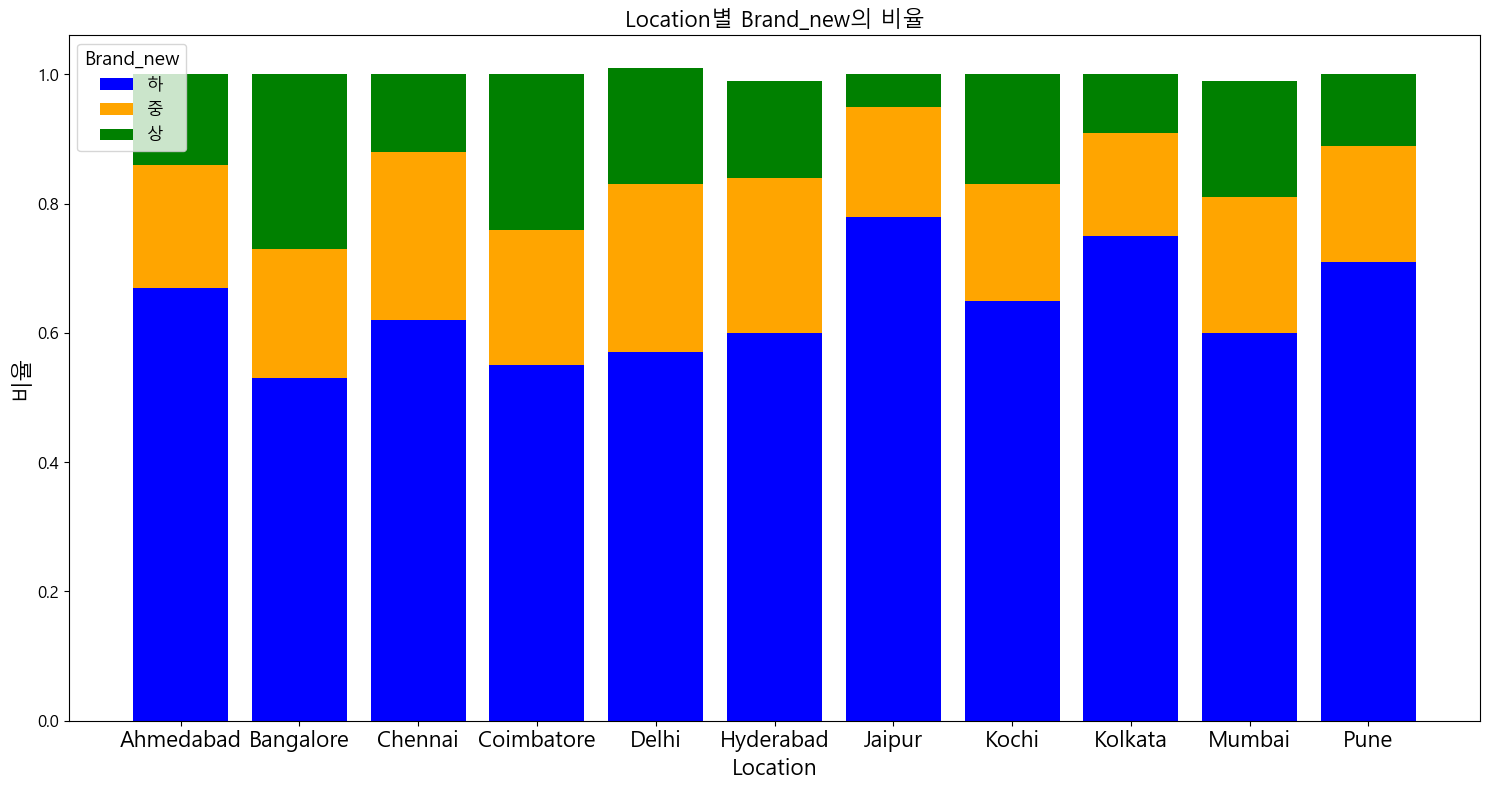

In [66]:
df_cross1 = pd.crosstab(df['Location'], df['Brand_new'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['하'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['중'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)
df_cross1['상'] = round(df_cross1.iloc[:,2] / df_cross1['sum'],2)


df_cross1[['하', '중', '상']]
df_cross1
# 누적 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# 막대 하단 위치 초기화
bottoms = [0] * len(df_cross1)
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# 각 비율을 누적 막대로 그리기
for i, column in enumerate(['하', '중', '상']):
    ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
    bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# 그래프 설정
ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
ax.set_title('Location별 Brand_new의 비율', fontsize=16)  # 제목 크기 조정
ax.legend(title='Brand_new', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# 눈금 레이블 크기 조정
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=12)

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [88]:
df['location_label']

0         location_big
1       location_small
2       location_small
3       location_small
4         location_big
             ...      
6046    location_small
6047      location_big
6048      location_big
6049      location_big
6050      location_big
Name: location_label, Length: 6051, dtype: object

In [86]:
df_cross1 = pd.crosstab(df['Location'], df['location_label'])
df_cross1['sum'] = df_cross1.sum(axis = 1)

df_cross1['location_big'] = round(df_cross1.iloc[:,0] / df_cross1['sum'],2)
df_cross1['location_small'] = round(df_cross1.iloc[:,1] / df_cross1['sum'],2)


df_cross1[['location_big', 'location_small']]
df_cross1
# # 누적 막대 그래프 그리기
# fig, ax = plt.subplots(figsize=(15, 8))  # 더 넓은 그래프를 위한 크기 조정

# # 막대 하단 위치 초기화
# bottoms = [0] * len(df_cross1)
# colors = ['blue', 'orange', 'green', 'red', 'purple']  # 5가지 색상으로 확장

# # 각 비율을 누적 막대로 그리기
# for i, column in enumerate(['location_big', 'location_small',]):
#     ax.bar(df_cross1.index, df_cross1[column], bottom=bottoms, label=column, color=colors[i])
#     bottoms = [b + h for b, h in zip(bottoms, df_cross1[column])]

# # 그래프 설정
# ax.set_xlabel('Location', fontsize=16)  # X축 라벨 크기 조정
# ax.set_ylabel('비율', fontsize=16)       # Y축 라벨 크기 조정
# ax.set_title('Location별 Brand_new의 비율', fontsize=16)  # 제목 크기 조정
# ax.legend(title='Brand_new', fontsize=12, title_fontsize=14)  # 범례 제목 및 크기 조정

# # 눈금 레이블 크기 조정
# plt.xticks(rotation=0, fontsize=16)
# plt.yticks(fontsize=12)

# # 레이아웃 최적화
# plt.tight_layout()
# plt.show()

location_label,location_big,location_small,sum
Location,,,
Ahmedabad,1.0,0.0,227
Bangalore,1.0,0.0,354
Chennai,0.0,1.0,489
Coimbatore,1.0,0.0,656
Delhi,1.0,0.0,564
Hyderabad,1.0,0.0,732
Jaipur,0.0,1.0,413
Kochi,1.0,0.0,668
Kolkata,0.0,1.0,540


In [78]:
df_cross1

Brand_new,1,2,3,sum
Location,,,,
Ahmedabad,152,43,32,227
Bangalore,186,71,97,354
Chennai,302,127,60,489
Coimbatore,363,136,157,656
Delhi,320,144,100,564
Hyderabad,441,179,112,732
Jaipur,322,69,22,413
Kochi,435,120,113,668
Kolkata,404,85,51,540


In [100]:
df['Location'].value_counts()

Location
Mumbai        802
Hyderabad     732
Kochi         668
Coimbatore    656
Pune          606
Delhi         564
Kolkata       540
Chennai       489
Jaipur        413
Bangalore     354
Ahmedabad     227
Name: count, dtype: int64

In [ ]:
# 선형이 아니고 name을 
# 가격 기준
# 데이터 전체의 신뢰도가 떨어진다고 판단하여, 추후 매입하는 중고차량에 대해, 다양한 품질 요소 데이터 수집 방안을 마련해, 데이터의 신뢰도를 높여 성공적인 중고차 가격 예측 도모 